1. Missing Completely At Random(MCAR):here nothing systematic is causing the value to be amiss, theres no relationship between the missing value and other values
2. Missing Not At Random(MNAR):is the opposite of MCAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ty=pd.read_csv('C:/pypy/titanic_train.csv')

In [3]:
ty.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
ty[ty['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
ty['Cabin_Null']=np.where(ty['Cabin'].isnull(),1,0)
ty['Cabin_Null'].mean()


0.7710437710437711

In [6]:
#the cabin values are missing not at random
ty.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

***Missing at Random***
example of this is when random people withhold their data for personal reasons 

***Techniques of handling missing values***

1. Mean median mode replacment
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary Imputation
6. Frequent categories imputation

In [7]:
### Mean/Median/ Mode Imputation
#This has the assumption that the data are MCAR
#we solve this by replacing the NAN with the most frequent occurance of the variables

In [2]:
we= pd.read_csv('C:/pypy/titanic_train.csv',usecols=['Age','Fare','Survived'])
we.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
#% of null values in "we" data

we.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def inputNAN(df, x):
    median=df[x].median()
    df[x+'Median']=df[x].fillna(median)

In [5]:
inputNAN(we,'Age',)

In [10]:
we.head()

,Survived,Age,Fare,AgeMedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
#lets check if the standard deviation of Age col and the Age median is similar

print(we.Age.std())
print(we.Age.std())

14.526497332334044
14.526497332334044


In [8]:
#since they are not so much farther apart it,
#the filling of missing val. with median will not tamper with the ML output

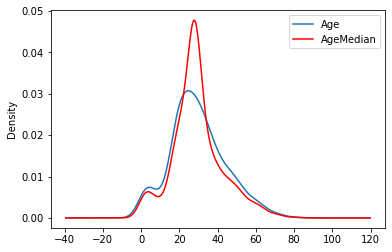

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
we['Age'].plot (kind='kde',ax=ax)
we['AgeMedian'].plot(kind='kde',color='red',ax=ax)
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### Advantages of Mean/Median Imputation
1. Easy to implement
2. Faster way to obtain the complete dataset
### Disadvantages
1. change or distortion in the original variance
2. Impacts correlation

### Random Sample Imputation
this consists of taking random observation in the dataset to fill the missing values
used when the data are missing completely at random(MCAR)

In [20]:
qw=pd.read_csv('C:/pypy/titanic_train.csv', usecols=(['Age','Fare','Survived']))

In [29]:
qw.head(100)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
95,0,NaN,8.0500
96,0,71.0,34.6542
97,1,23.0,63.3583
98,1,34.0,23.0000


In [22]:
qw.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
qw['Age'].isnull().sum()

177

In [25]:
#to pick up random samples from a column

qw['Age'].dropna().sample()

820    52.0
Name: Age, dtype: float64

In [33]:
#here we pick 177 age values that are not null randomly 
qw['Age'].dropna().sample(qw['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
qw['Age'].dropna().sample(177,random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [57]:
def inputNAN(df, x):
    median=df[x].median()
    df[x+'Median']=df[x].fillna(median)
    df[x+'Random']=df[x]
    random_sample=df[x].dropna().sample(df[x].isnull().sum(),random_state=0)
    random_sample.index=df[df[x].isnull()].index
    df.loc[df[x].isnull(),x+'Random']=random_sample

In [58]:
inputNAN(qw,'Age')

In [59]:
qw.head(60)

,Survived,Age,Fare,AgeMedian,AgeRandom
0,0.0,22.0,7.2500,22.0,22.00
1,1.0,38.0,71.2833,38.0,38.00
2,1.0,26.0,7.9250,26.0,26.00
3,1.0,35.0,53.1000,35.0,35.00
4,0.0,35.0,8.0500,35.0,35.00
5,0.0,NaN,8.4583,28.0,28.00
6,0.0,54.0,51.8625,54.0,54.00
7,0.0,2.0,21.0750,2.0,2.00
8,1.0,27.0,11.1333,27.0,27.00
9,1.0,14.0,30.0708,14.0,14.00


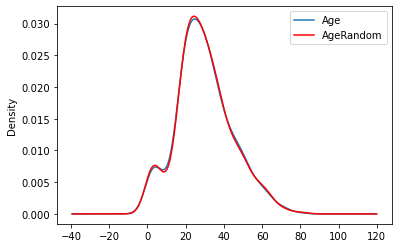

In [61]:
fig=plt.figure()
ax=fig.add_subplot(111)
qw['Age'].plot (kind='kde',ax=ax)
qw['AgeRandom'].plot(kind='kde',color='red',ax=ax)
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


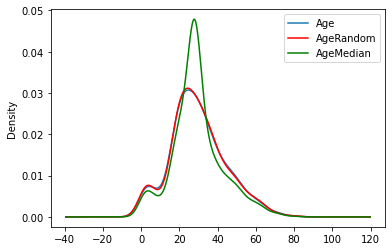

In [62]:
fig=plt.figure()
ax=fig.add_subplot(111)
qw['Age'].plot (kind='kde',ax=ax)
qw['AgeRandom'].plot(kind='kde',color='red',ax=ax)
qw['AgeMedian'].plot(kind='kde',color='green',ax=ax)
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantage of Random sampling inputation

1. theres no distortion of variance
2. easy to implement

### Disadvantages
1. it doesnt work in every situation

#### Capturing NAN values with a new feature
this works well when the data is not missing completely at random

In [75]:
dt=pd.read_csv('C:/pypy/titanic_train.csv', usecols=(['Age','Fare','Survived']))

In [76]:
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [78]:
dt['AgeNaN']=np.where(dt['Age'].isnull(),1,0)

In [80]:
dt.head(10)

,Survived,Age,Fare,AgeNaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [90]:
dt['Age'].fillna(dt['Age'].median(),inplace=True)

In [91]:
dt.head(20)

,Survived,Age,Fare,AgeNaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages

1. Captures the importance of te missing values
2. easy to implement
### Disadvantages
1. creates additional features(curse of dimensionality)

   ### End of Distribution Imputation
   
  here, we replace the nan values with values found after the 3rd std of the data

In [92]:
dt=pd.read_csv('C:/pypy/titanic_train.csv', usecols=(['Age','Fare','Survived']))

<AxesSubplot:>

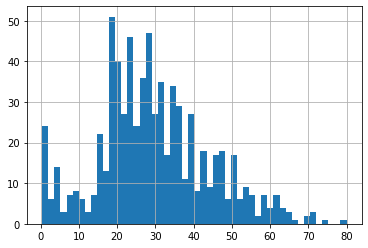

In [93]:
dt['Age'].hist(bins=50)

In [101]:
 extreme=dt['Age'].mean()+3*dt['Age'].std()

In [102]:
extreme

73.27860964406095

In [103]:
 dt.Age.mean()+3*dt.Age.std()

73.27860964406095

<AxesSubplot:xlabel='Age'>

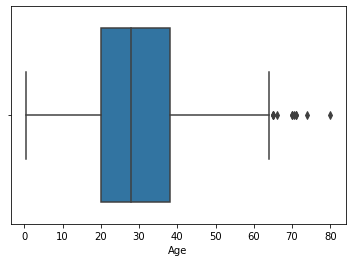

In [100]:
sns.boxplot('Age',data=dt)

In [104]:
def inputNAN(dt,x):
    median=dt[x].median()
    extreme=dt[x].mean()+3*dt[x].std()
    dt[x+'_end ditribution']=dt[x].fillna(extreme)
    dt[x].fillna(median,inplace=True)
    

In [105]:
inputNAN(dt,'Age')

In [106]:
dt.head(50)

,Survived,Age,Fare,Age_end ditribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:xlabel='Age_end ditribution'>

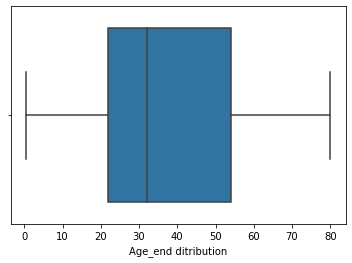

In [109]:
sns.boxplot('Age_end ditribution',data=dt)

<AxesSubplot:>

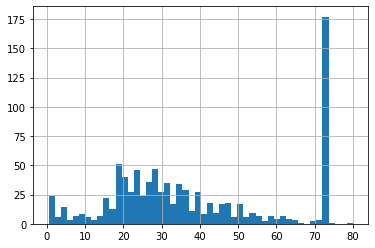

In [110]:
dt['Age_end ditribution'].hist(bins=50)

<AxesSubplot:>

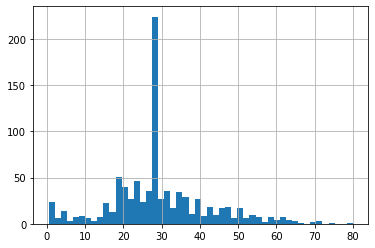

In [112]:
#note thar this age contains median inplace of its nan values 
dt['Age'].hist(bins=50)

### Advantages

1. easy to implement
2. Captures the importance of missingess if there is one

### disadvantages
1. distorts the original distribution of the variable
2. if missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. if the number of NAN value is big, it will mask the true outliers in the distribution.
4. if the number of NAN values is small, the replaced NAN may be considered an outlier and pre-processed in a subsequential F.Eng 

   ### Arbitrary Value Imputation
     involves replacing NAN with an arbitrary value
     derived from kaggle competition

In [113]:
df=pd.read_csv('C:/pypy/titanic_train.csv', usecols=(['Age','Fare','Survived']))

In [114]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [115]:
def inputNAN(df,x):
    df[x+'_zero'] = df[x].fillna(0)
    df[x+'_100'] = df[x].fillna(100)

In [116]:
inputNAN(df,'Age')

In [117]:
df.head(30)

,Survived,Age,Fare,Age_zero,Age_100
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


### Advantages

1. easy to implement
2. Captures the importance of missingess if there is one
### disadvantages
1. distorts the original distribution of the variable
2. if missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to determine which value to use


In [119]:
### HANDLING MISSING CATEGORICAL VALUES 

  ### replacing with the most freq category
1. this is applied where the missing values are few, a hand full
2. we can use mode to approach this or finding the highest count through(value_counts) and adding the first index

In [173]:
fg=pd.read_csv('C:/pypy/trainn.csv',usecols=['GarageType','FireplaceQu','BsmtQual','SalePrice'])

In [166]:
fg.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [133]:
fg.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

### Compute the frequency of every Feature

In [138]:
fg.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [139]:
fg.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

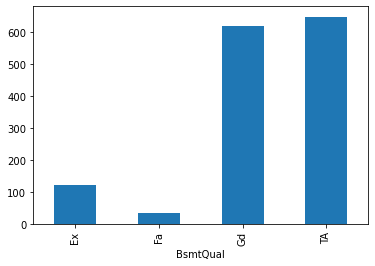

In [140]:
fg.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:>

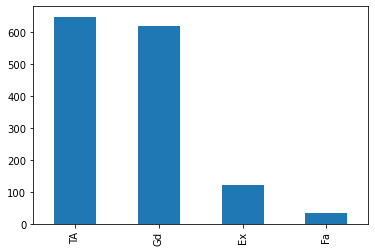

In [141]:
fg.BsmtQual.value_counts().plot.bar()

In [142]:
fg.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [143]:
fg.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [167]:
fg.GarageType.value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [168]:
fg['GarageType'].value_counts().index[0]

'Attchd'

In [175]:
fg['GarageType'].mode()[0]

'Attchd'

In [169]:
def inputNAN(df,x):
    most_freq_cat= df[x].value_counts().index[0]
    df[x].fillna(most_freq_cat,inplace=True)

In [170]:
for x in ['BsmtQual','FireplaceQu','GarageType']:
    inputNAN(df,x)



In [171]:
fg.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [172]:
fg.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### Advantages of modal replacement
1. easy to implement
2. faster to implement
### disadvantages
1. since we are using the most frequent labels, it may use them in an over presented way if they are many NANs
2. distorts the relation of the most freq labels

### 2 Adding a variable to capture NAN

In [176]:
ty=pd.read_csv('C:/pypy/trainn.csv',usecols=['GarageType','FireplaceQu','BsmtQual','SalePrice'])

In [177]:
ty['BsmtQualNAN']=np.where(ty['BsmtQual'].isnull(),1,0)

In [179]:
freq=ty['BsmtQual'].mode()[0]

In [181]:
ty['BsmtQual'].fillna(freq,inplace=True)

In [184]:
ty.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualNAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [185]:
ty['FireplaceQuNAN']=np.where(ty['FireplaceQu'].isnull(),1,0)
freq=ty['FireplaceQu'].mode()[0]
ty['FireplaceQu'].fillna(freq,inplace=True)

In [186]:
ty.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualNAN,FireplaceQuNAN
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


 #### if u have more freq category, we replace a nan with a new category

In [188]:
gy=pd.read_csv('C:/pypy/trainn.csv',usecols=['GarageType','FireplaceQu','BsmtQual','SalePrice'])

In [189]:
gy.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [196]:
def inputNAN(df,x):
    df[x].fillna('Missing',inplace=True)

In [198]:
for x in ['BsmtQual','FireplaceQu','GarageType']:
    inputNAN(gy,x)

In [199]:
gy.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
